In [8]:
from __future__ import print_function, division

import pandas as pd
import numpy as np
import os
from PIL import Image

from ml_utils import imshow, img_to_nparray, find_img_stat, get_image_filepaths, plot_pca, eigenimages

import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
data_dir = "dataset/"

# Exploratory data analysis

Lets take a closer look, at what are we even working with in the first place

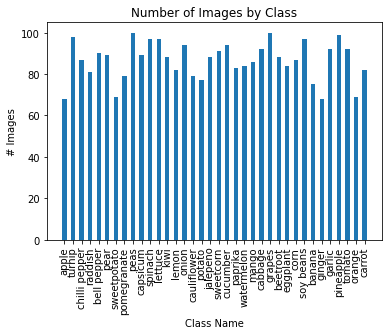

In [10]:
classes = { class_: len( os.listdir( os.path.join( data_dir, "train", class_ ) ) ) for class_ in os.listdir( os.path.join( data_dir, "train" ) ) }

plt.bar(classes.keys(), classes.values(), width = 0.5)
plt.title("Number of Images by Class")
plt.xlabel('Class Name')
plt.xticks(rotation='vertical')
plt.ylabel('# Images');

The ratio between single classes is quite balanced, we probably will not need to discard any of the images because of uneven ratios.

In [20]:
from collections import defaultdict
sizes = defaultdict( int )
for class_ in os.listdir( os.path.join( data_dir, "train" ) ):
    for img_path in os.listdir( os.path.join( data_dir, "train", class_ ) ):
        sizes[ Image.open( os.path.join( data_dir, "train", class_, img_path ) ).size ] += 1    

len( sizes )

1689

We have ~1700 distinct shapes amongst ~3600 images, therefore we will necessary need some cropping in the training preprocessing pipeline

Now lets try to visualize our data using few handy auxiliary functions, the implementation can be found in `ml_utils.py`

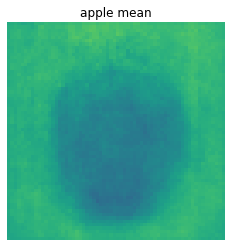

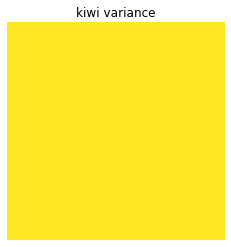

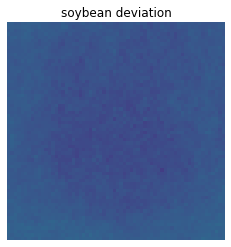

In [23]:
apple_images = img_to_nparray( os.path.join( data_dir, "train", "apple" ), get_image_filepaths( "apple" ) )
kiwi_images = img_to_nparray( os.path.join( data_dir, "train", "kiwi" ), get_image_filepaths( "kiwi" ) )
soybean_images = img_to_nparray( os.path.join( data_dir, "train", "soy beans" ), get_image_filepaths( "soy beans" ) )

apple_mean = find_img_stat( apple_images, "apple mean", f=np.mean, axis=0 )
kiwi_var = find_img_stat( kiwi_images, "kiwi variance", f=np.var, axis=0 )
pineapple_dev = find_img_stat( soybean_images, "soybean deviation", f=np.std, axis=0 )

During PCA analysis, we were following [this article](https://towardsdatascience.com/principal-component-analysis-in-depth-understanding-through-image-visualization-892922f77d9f) on towardsdatascience

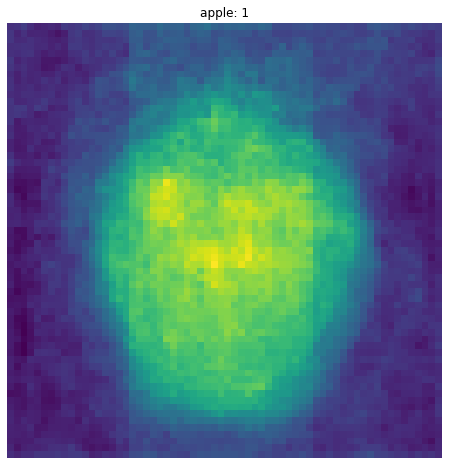

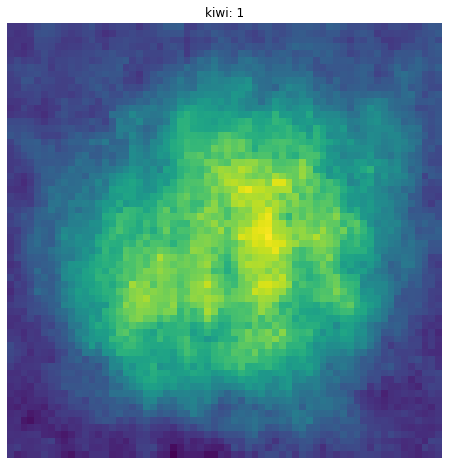

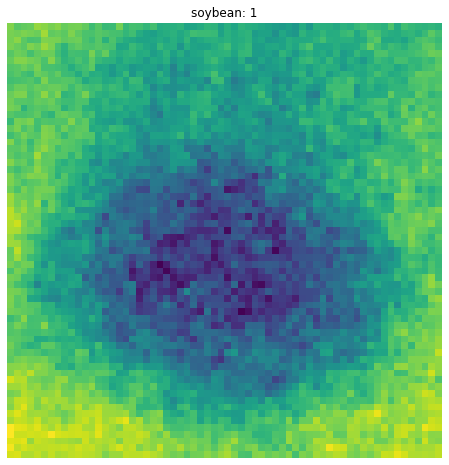

In [5]:
plot_pca( eigenimages( apple_images ), "apple" )
plot_pca( eigenimages( kiwi_images ), "kiwi" )
plot_pca( eigenimages( soybean_images ), "soybean" )

**Important fact we discovered during exploratory analysis**, is that there is significant overlap between train, test and validation split. This could cause a massive missinterpretation of the model accuracy, as it would be evaluated on the same data it was trained on. We are tackling this in `data_preparation` part, which is in respective model notebook